# No transform

In [1]:
from data2 import CellDataset

d = {'expression': False, 'center': False, 'ome': True, 'mask': False}
ds = CellDataset('train', d)

In [2]:
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

s = StandardScaler(with_mean=True, with_std=True)

for i in tqdm(range(len(ds))):
    l= ds[i]
    x = l[0]
    s.partial_fit(x.reshape(-1, x.shape[-1]))
    
print(s.mean_, s.var_)

  0%|          | 1617/446738 [00:02<13:21, 555.47it/s]


KeyboardInterrupt: 

In [ ]:
print(len(ds))
ds[len(ds) - 1]

In [12]:
s.mean_

array([1.29137214, 0.12204645, 0.04746121, 1.17126412, 0.24452078,
       0.427998  , 0.07071735, 0.11199224, 0.04566163, 0.63347302,
       0.62917786, 0.13072797, 0.27373635, 0.02843522, 0.06192851,
       0.38788928, 0.11424681, 0.07840189, 0.2078604 , 0.02232897,
       4.8215692 , 0.13145834, 0.05435668, 0.17872389, 0.0315007 ,
       0.03429091, 0.20750708, 0.6714512 , 0.09881951, 0.12434302,
       0.51898777, 0.18728622, 0.03190125, 0.28144336, 0.11512508,
       2.50877083, 0.16205379, 0.52616125, 0.99683675])

In [13]:
s.var_

array([3.17532575e+01, 3.66818966e-01, 6.65207711e-01, 3.33794102e+01,
       4.22485386e+00, 9.36283163e+00, 2.23369604e-01, 7.86815906e+00,
       5.32690521e-01, 4.84695307e+01, 2.08140218e+01, 7.09183370e+00,
       1.92951659e+00, 9.45509177e-01, 9.75673669e-01, 2.01367976e+02,
       1.37284794e+00, 3.73569237e-01, 4.87192135e+00, 5.64851603e-01,
       5.69273662e+02, 6.52422796e+01, 3.68515530e-01, 1.66068873e+00,
       1.29575157e-01, 6.50012842e-01, 2.25449424e+01, 1.09436277e+01,
       2.24749223e+00, 8.06681989e+00, 5.34230461e+00, 8.48350188e+00,
       9.04868194e-02, 3.58260224e+00, 1.58120290e+00, 2.32770610e+02,
       6.65773423e-01, 6.49080885e+00, 2.20182966e+01])

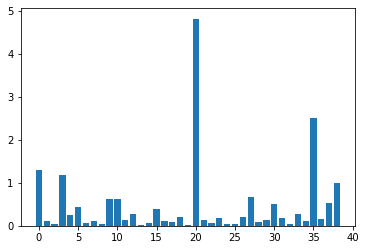

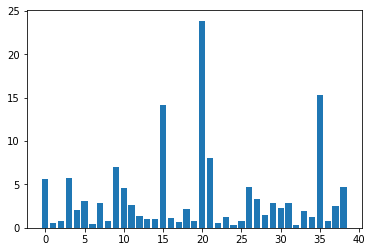

<BarContainer object of 39 artists>

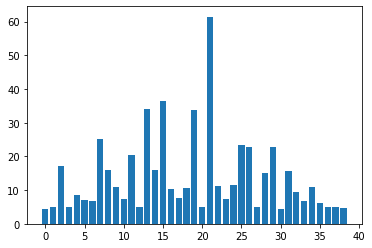

In [16]:
import numpy as np
import matplotlib.pyplot as plt

mean = np.array([1.29137214, 0.12204645, 0.04746121, 1.17126412, 0.24452078,
       0.427998  , 0.07071735, 0.11199224, 0.04566163, 0.63347302,
       0.62917786, 0.13072797, 0.27373635, 0.02843522, 0.06192851,
       0.38788928, 0.11424681, 0.07840189, 0.2078604 , 0.02232897,
       4.8215692 , 0.13145834, 0.05435668, 0.17872389, 0.0315007 ,
       0.03429091, 0.20750708, 0.6714512 , 0.09881951, 0.12434302,
       0.51898777, 0.18728622, 0.03190125, 0.28144336, 0.11512508,
       2.50877083, 0.16205379, 0.52616125, 0.99683675])
std = np.sqrt(np.array([3.17532575e+01, 3.66818966e-01, 6.65207711e-01, 3.33794102e+01,
       4.22485386e+00, 9.36283163e+00, 2.23369604e-01, 7.86815906e+00,
       5.32690521e-01, 4.84695307e+01, 2.08140218e+01, 7.09183370e+00,
       1.92951659e+00, 9.45509177e-01, 9.75673669e-01, 2.01367976e+02,
       1.37284794e+00, 3.73569237e-01, 4.87192135e+00, 5.64851603e-01,
       5.69273662e+02, 6.52422796e+01, 3.68515530e-01, 1.66068873e+00,
       1.29575157e-01, 6.50012842e-01, 2.25449424e+01, 1.09436277e+01,
       2.24749223e+00, 8.06681989e+00, 5.34230461e+00, 8.48350188e+00,
       9.04868194e-02, 3.58260224e+00, 1.58120290e+00, 2.32770610e+02,
       6.65773423e-01, 6.49080885e+00, 2.20182966e+01]))

plt.bar(np.arange(39), mean)
plt.show()
plt.bar(np.arange(39), std)
plt.show()
plt.bar(np.arange(39), std / mean)

In [17]:
import torch
a = torch.rand(3, 32, 31)
b = torch.rand(3)
(a.permute(1, 2, 0) - b).permute(2, 0, 1).shape

torch.Size([3, 32, 31])

# arcsinh transform

In [4]:
from data2 import CellDataset

d = {'expression': False, 'center': False, 'ome': True, 'mask': False}
ds = CellDataset('train', d)

In [5]:
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

s = StandardScaler(with_mean=True, with_std=True)

for i in tqdm(range(len(ds))):
    l= ds[i]
    x = l[0]
    x = np.arcsinh(x)
    s.partial_fit(x.reshape(-1, x.shape[-1]))
    
print(s.mean_, s.var_)

  0%|          | 0/446738 [00:00<?, ?it/s]


NameError: name 'np' is not defined

In [6]:
s.mean_

array([0.3128328 , 0.08154685, 0.02617499, 0.31149776, 0.10011313,
       0.13143819, 0.04897958, 0.05522078, 0.02628855, 0.12524123,
       0.15552816, 0.08004793, 0.13349437, 0.02045013, 0.04155505,
       0.07637688, 0.05526352, 0.04818857, 0.11221485, 0.01779799,
       0.53215206, 0.08219107, 0.03510931, 0.08550659, 0.02237169,
       0.02657647, 0.09854327, 0.22031476, 0.04274541, 0.06778383,
       0.24079644, 0.09004467, 0.0234197 , 0.13312621, 0.04914724,
       0.29719813, 0.10172928, 0.18843424, 0.25893724])

In [7]:
s.var_

array([0.81152901, 0.11195328, 0.03844969, 0.76020458, 0.19636732,
       0.30648388, 0.06448294, 0.08879372, 0.03747649, 0.32956727,
       0.40133228, 0.11878445, 0.24177647, 0.02510913, 0.05398327,
       0.15110854, 0.09525968, 0.07278724, 0.17972434, 0.01950939,
       1.73329118, 0.11334923, 0.04934192, 0.15689578, 0.02762272,
       0.03045641, 0.16039316, 0.49438282, 0.07485281, 0.10151964,
       0.45035213, 0.15424273, 0.02854364, 0.23177609, 0.09494518,
       0.98995058, 0.14861627, 0.41785507, 0.66190155])

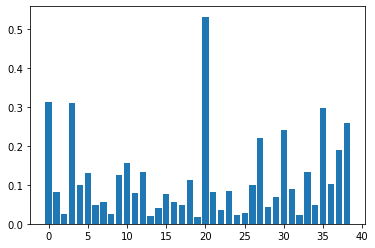

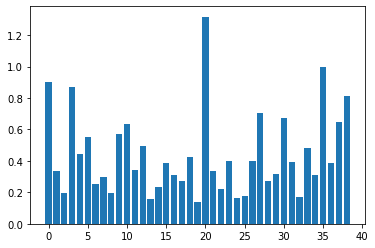

<BarContainer object of 39 artists>

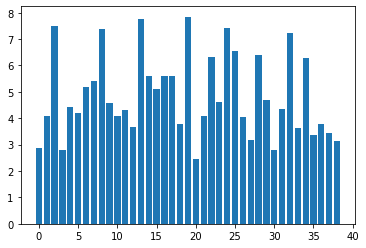

In [3]:
import numpy as np
import matplotlib.pyplot as plt

mean = np.array([0.3128328 , 0.08154685, 0.02617499, 0.31149776, 0.10011313,
       0.13143819, 0.04897958, 0.05522078, 0.02628855, 0.12524123,
       0.15552816, 0.08004793, 0.13349437, 0.02045013, 0.04155505,
       0.07637688, 0.05526352, 0.04818857, 0.11221485, 0.01779799,
       0.53215206, 0.08219107, 0.03510931, 0.08550659, 0.02237169,
       0.02657647, 0.09854327, 0.22031476, 0.04274541, 0.06778383,
       0.24079644, 0.09004467, 0.0234197 , 0.13312621, 0.04914724,
       0.29719813, 0.10172928, 0.18843424, 0.25893724])
std = np.sqrt(np.array([0.81152901, 0.11195328, 0.03844969, 0.76020458, 0.19636732,
       0.30648388, 0.06448294, 0.08879372, 0.03747649, 0.32956727,
       0.40133228, 0.11878445, 0.24177647, 0.02510913, 0.05398327,
       0.15110854, 0.09525968, 0.07278724, 0.17972434, 0.01950939,
       1.73329118, 0.11334923, 0.04934192, 0.15689578, 0.02762272,
       0.03045641, 0.16039316, 0.49438282, 0.07485281, 0.10151964,
       0.45035213, 0.15424273, 0.02854364, 0.23177609, 0.09494518,
       0.98995058, 0.14861627, 0.41785507, 0.66190155]))

plt.bar(np.arange(39), mean)
plt.show()
plt.bar(np.arange(39), std)
plt.show()
plt.bar(np.arange(39), std / mean)

## Plotting the transformed dataset

In [98]:
from torch.utils.data import Dataset
from data2 import CellDataset
import torchvision.transforms.functional as TF
import random
from torch import nn

def ome_normalization():
    mean = np.array([0.3128328 , 0.08154685, 0.02617499, 0.31149776, 0.10011313,
           0.13143819, 0.04897958, 0.05522078, 0.02628855, 0.12524123,
           0.15552816, 0.08004793, 0.13349437, 0.02045013, 0.04155505,
           0.07637688, 0.05526352, 0.04818857, 0.11221485, 0.01779799,
           0.53215206, 0.08219107, 0.03510931, 0.08550659, 0.02237169,
           0.02657647, 0.09854327, 0.22031476, 0.04274541, 0.06778383,
           0.24079644, 0.09004467, 0.0234197 , 0.13312621, 0.04914724,
           0.29719813, 0.10172928, 0.18843424, 0.25893724])
    std = np.sqrt(np.array([0.81152901, 0.11195328, 0.03844969, 0.76020458, 0.19636732,
           0.30648388, 0.06448294, 0.08879372, 0.03747649, 0.32956727,
           0.40133228, 0.11878445, 0.24177647, 0.02510913, 0.05398327,
           0.15110854, 0.09525968, 0.07278724, 0.17972434, 0.01950939,
           1.73329118, 0.11334923, 0.04934192, 0.15689578, 0.02762272,
           0.03045641, 0.16039316, 0.49438282, 0.07485281, 0.10151964,
           0.45035213, 0.15424273, 0.02854364, 0.23177609, 0.09494518,
           0.98995058, 0.14861627, 0.41785507, 0.66190155]))

    normalize = transforms.Normalize(mean=mean, std=std)
    return normalize

class PadByOne:
    def __call__(self, image):
        return F.pad(image, pad=[0, 1, 0, 1], mode='constant', value=0)

class MyRotationTransform:
    """Rotate by one of the given angles."""

    def __init__(self, angles):
        self.angles = angles

    def __call__(self, x):
        angle = random.choice(self.angles)
        return TF.rotate(x, angle)

class RGBCells(Dataset):
    def __init__(self, split, augment=False, aggressive_rotation=False):
        assert not (augment is False and aggressive_rotation is True)
        d = {'expression': False, 'center': False, 'ome': True, 'mask': False}
        self.ds = CellDataset(split, d)
        self.augment = augment
        self.aggressive_rotation = aggressive_rotation
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            PadByOne()
        ])
        self.augment_transform = transforms.Compose([
            MyRotationTransform(angles=[90, 180, 270]) if not self.aggressive_rotation else transforms.RandomApply(
                nn.ModuleList([transforms.RandomRotation(degrees=360)])),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
        ])
        self.normalize = ome_normalization()

    def __len__(self):
        return len(self.ds)

    def __getitem__(self, item):
        x = self.ds[item][0]
        x = self.transform(x)
        if self.augment:
            x = self.augment_transform(x)
        x = torch.asinh(x)
        x = x.permute(1, 2, 0)
        x = (x - self.normalize.mean) / self.normalize.std
        x = x.permute(2, 0, 1)
        x = x.float()
        return x


In [83]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np


ds = RGBCells('train', augment=True)
train_loader = DataLoader(ds, batch_size=1, num_workers=0, shuffle=True)

In [75]:
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

s = StandardScaler(with_mean=True, with_std=True)

n = 10000
for i, x in enumerate(tqdm(train_loader)):
    x = x.squeeze(0)
    x = x.permute(1, 2, 0)
    x = x.reshape(-1, x.shape[-1])
    s.partial_fit(x)
    if i >= n:
        break
print(s.mean_, s.var_)

  2%|▏         | 10000/446738 [00:45<33:18, 218.48it/s]

[0.01378614 0.00808854 0.00517827 0.01312889 0.00829928 0.00742571
 0.00684921 0.00649001 0.00383802 0.00472953 0.00709086 0.0080853
 0.00777017 0.00277625 0.00828573 0.00588104 0.00720933 0.00725969
 0.00963261 0.00419115 0.01439043 0.00802309 0.00443604 0.00814698
 0.00382131 0.00475404 0.0126667  0.01148266 0.00698122 0.00942817
 0.01342819 0.01092798 0.00296577 0.01073743 0.00690954 0.01185128
 0.0098266  0.01194777 0.01310025] [0.93520485 0.93155037 0.92448465 0.93128297 0.93562722 0.92711972
 0.93654741 0.94314133 0.91180048 0.92784966 0.92558437 0.93537326
 0.92226525 0.91423244 0.96068938 0.92227371 0.95491893 0.94514198
 0.93634457 0.93016077 0.92836282 0.92761875 0.92039655 0.93600546
 0.91980155 0.92985504 0.97384902 0.93104059 0.95672773 0.95029852
 0.93239394 0.95124365 0.91592181 0.9407232  0.94437067 0.93537778
 0.9338465  0.93700833 0.93693791]


# Plotting cells

## no transform

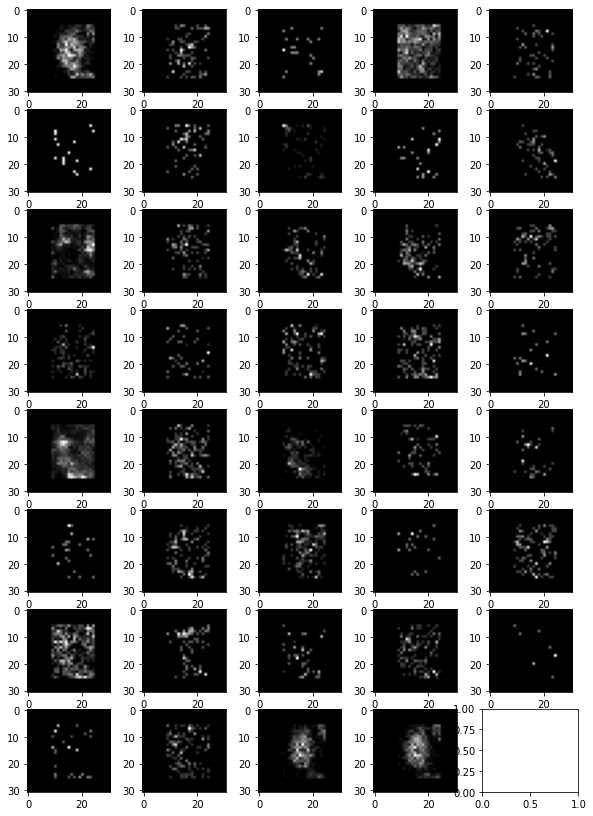

In [10]:
import matplotlib
from data2 import CellDataset

d = {'expression': False, 'center': False, 'ome': True, 'mask': False}
ds = CellDataset('train', d)
cell_k = 10000
x = ds[cell_k][0]
# plt.imshow(x)
axes = plt.subplots(8, 5, figsize=(5 * 2, 8 * 1.8))[1].flatten()
for i in range(39):
    axes[i].imshow(x[:, :, i], cmap=matplotlib.cm.get_cmap('gray'))

## transform, no scaling, no centering

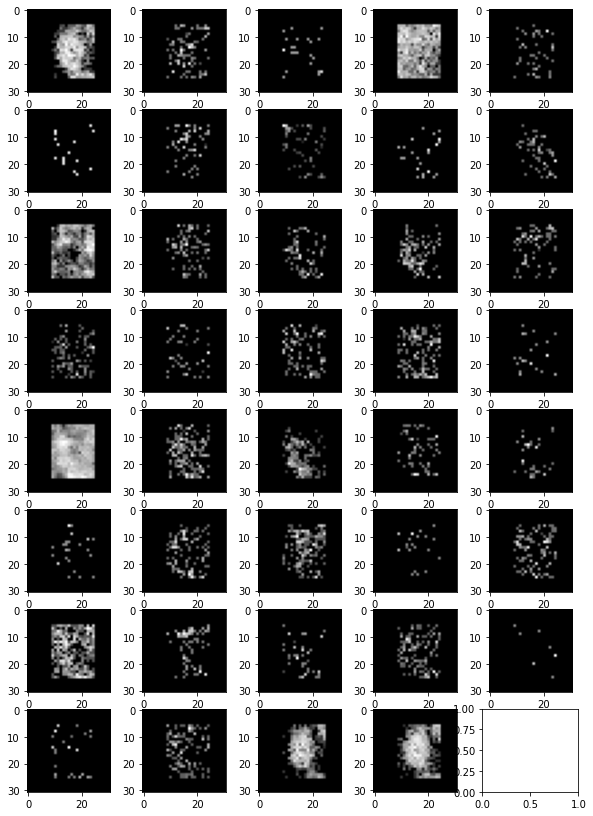

In [13]:
y = np.arcsinh(x)
axes = plt.subplots(8, 5, figsize=(5 * 2, 8 * 1.8))[1].flatten()
for i in range(39):
    axes[i].imshow(y[:, :, i], cmap=matplotlib.cm.get_cmap('gray'))

## transform, scaling, centering

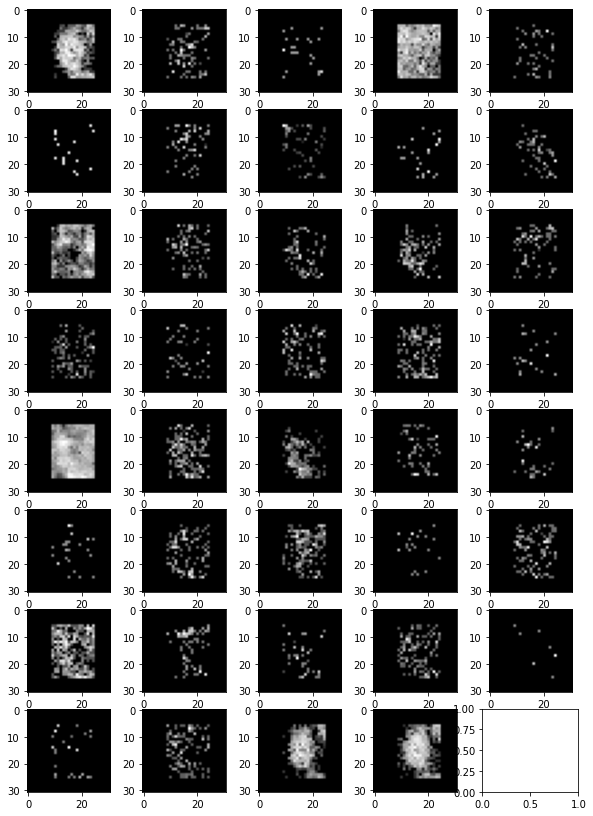

In [16]:
mean = np.array([0.3128328 , 0.08154685, 0.02617499, 0.31149776, 0.10011313,
       0.13143819, 0.04897958, 0.05522078, 0.02628855, 0.12524123,
       0.15552816, 0.08004793, 0.13349437, 0.02045013, 0.04155505,
       0.07637688, 0.05526352, 0.04818857, 0.11221485, 0.01779799,
       0.53215206, 0.08219107, 0.03510931, 0.08550659, 0.02237169,
       0.02657647, 0.09854327, 0.22031476, 0.04274541, 0.06778383,
       0.24079644, 0.09004467, 0.0234197 , 0.13312621, 0.04914724,
       0.29719813, 0.10172928, 0.18843424, 0.25893724])
std = np.sqrt(np.array([0.81152901, 0.11195328, 0.03844969, 0.76020458, 0.19636732,
       0.30648388, 0.06448294, 0.08879372, 0.03747649, 0.32956727,
       0.40133228, 0.11878445, 0.24177647, 0.02510913, 0.05398327,
       0.15110854, 0.09525968, 0.07278724, 0.17972434, 0.01950939,
       1.73329118, 0.11334923, 0.04934192, 0.15689578, 0.02762272,
       0.03045641, 0.16039316, 0.49438282, 0.07485281, 0.10151964,
       0.45035213, 0.15424273, 0.02854364, 0.23177609, 0.09494518,
       0.98995058, 0.14861627, 0.41785507, 0.66190155]))


z = y.copy()
z = (z - mean) / std
axes = plt.subplots(8, 5, figsize=(5 * 2, 8 * 1.8))[1].flatten()
for i in range(39):
    axes[i].imshow(z[:, :, i], cmap=matplotlib.cm.get_cmap('gray'))

Maybe I should use quantiles to perform scaling and centering, or maybe just scaling, no centering. Otherwise the background is different between channels. But maybe this is not a problem since they are quite similar, and among cells the background, which is always 0, is identical

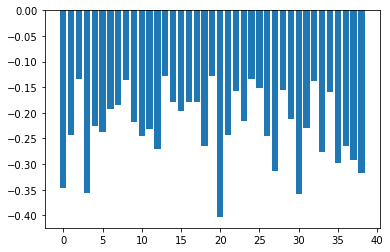

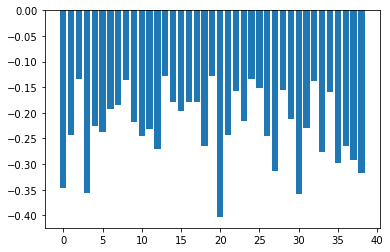

In [38]:
plt.bar(np.arange(39), z[0, 0, :])
plt.show()

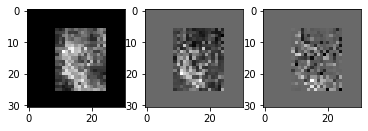

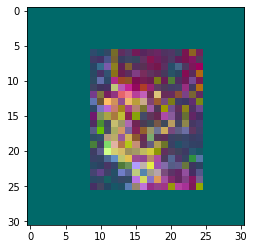

In [39]:
from sklearn.decomposition import PCA
reducer = PCA(3)
pca = z.reshape((-1, 39))
pca = reducer.fit_transform(pca)
a = np.min(pca, axis=0)
b = np.max(pca, axis=0)
pca = (pca - a) / (b - a)
pca.shape = [z.shape[0], z.shape[1], 3]
axes = plt.subplots(1, 3, figsize=(3 * 2, 1 * 1.8))[1].flatten()
for i in range(3):
    axes[i].imshow(pca[:, :, i], cmap=matplotlib.cm.get_cmap('gray'))
plt.show()
plt.imshow(pca)
plt.show()

## per cell PCA

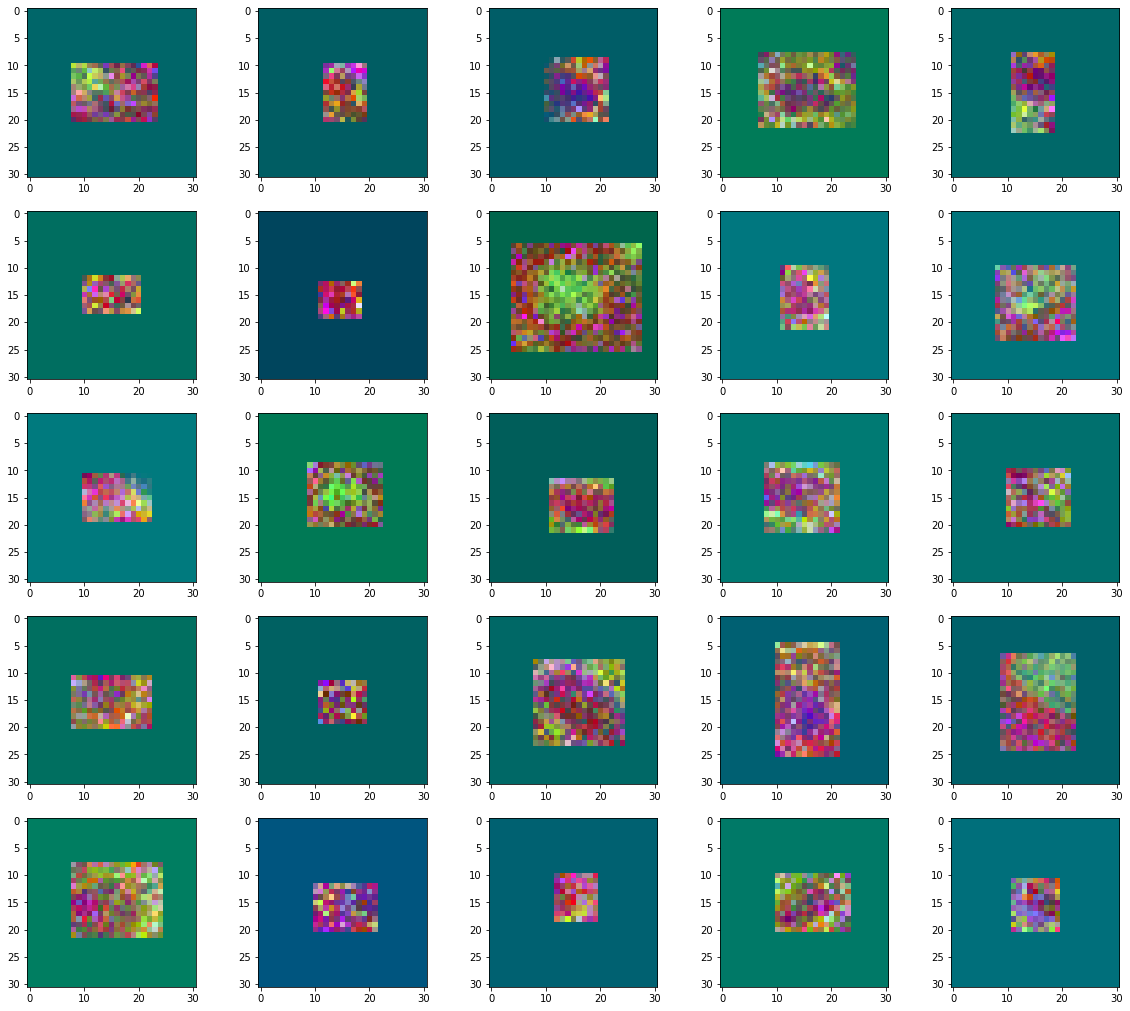

In [55]:
axes = plt.subplots(5, 5, figsize=(5 * 4, 5 * 3.6))[1].flatten()
for i in range(25):
    k = 1000 + i
    x = ds[k][0]
    z = (np.arcsinh(x) - mean) / std
    reducer = PCA(3)
    pca = z.reshape((-1, 39))
    pca = reducer.fit_transform(pca)
    a = np.min(pca, axis=0)
    b = np.max(pca, axis=0)
    pca = (pca - a) / (b - a)
    pca.shape = [z.shape[0], z.shape[1], 3]
    axes[i].imshow(pca)

## global PCA

[ -1.89303345 -10.03051639  -6.08467324] [22.14650635 11.09995976 11.53956775]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[-3.43603055e-15  1.09276271e-01  5.56130924e-02]
[-3.43603055e-15  1.48393526e-01  8.36480371e-02]
[-3.43603055e-15  5.19993307e-02  8.04801786e-02]
[-3.43603055e-15  1.83130184e-01  1.13612194e-01]
[-3.43603055e-15  2.37638986e-01  8.72671466e-02]
[-3.43603055e-15  1.63315212e-01  7.08135735e-03]
[-3.43603055e-15  7.76435354e-02  7.29376253e-04]
[-3.43603055e-15  1.18914614e-01  8.95929545e-02]
[0.86345927 1.00000104 0.89918159]
[-3.43603055e-15  1.53196648e-01  1.18216606e-01]
[-3.43603055e-15  1.08866244e-01  4.28192696e-02]
[-3.43603055e-15  1.53753647e-01  4.88656262e-02]
[-3.43603055e-15  7.29302189e-02  3.08632581e-02]
[1.         0.81472952 0.81172019]
[-3.43603055e-15  1.43492720e-01  1.13381951e-01]
[-3.43603055e-15  1.43492720e-01  9.51821018e-02]
[-3.43603055e-15  1.80698450e-01  4.39530669e-02]
[-3.43603055e-15 -8.08591556e-05  5.92350005e-02]
[-3.43603055e-15  9.44070541e-02  1.47725832e-01]
[-3.43603055e-15  1.36606353e-01  2.98987016e-02]
[-3.43603055e-15  1.21975248e-

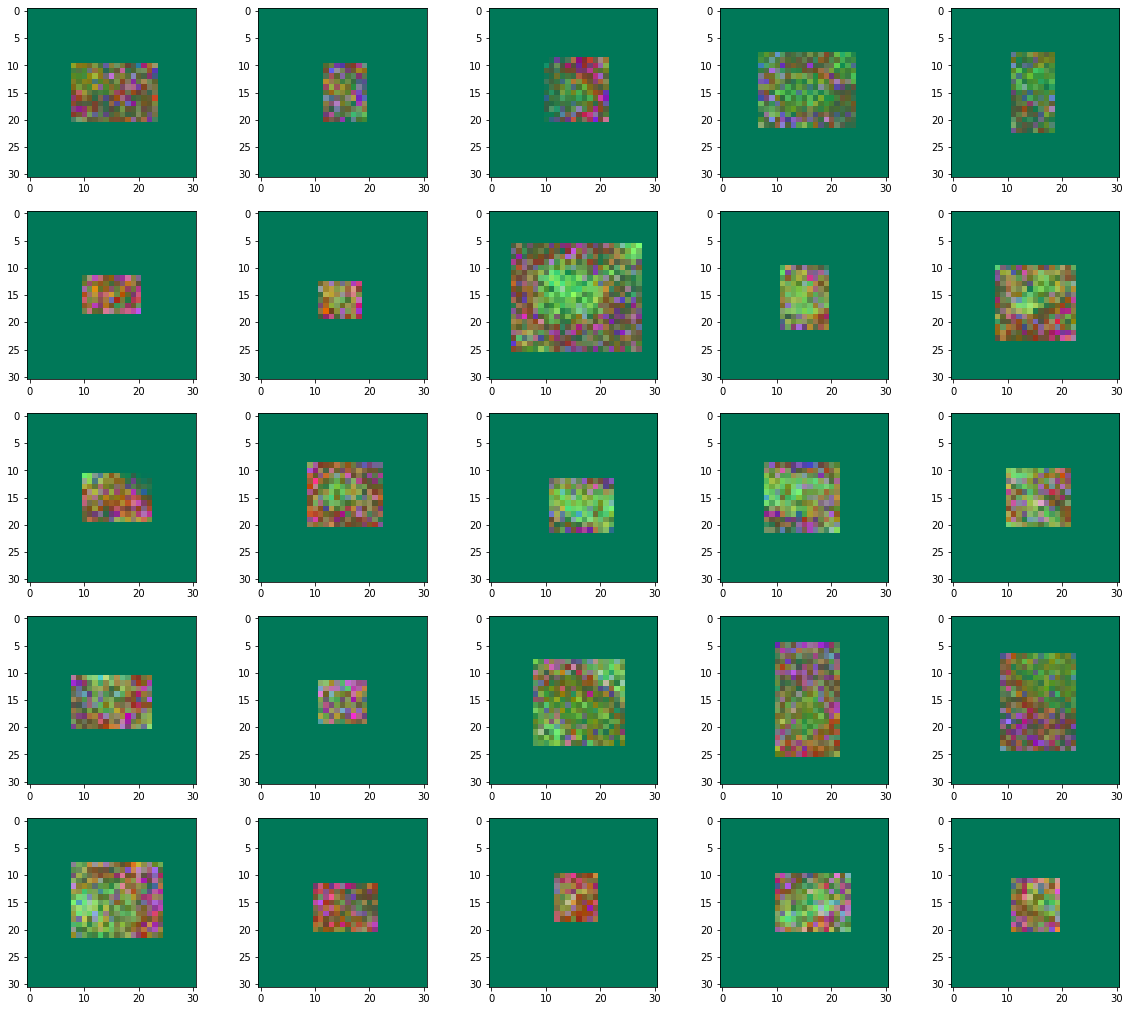

In [56]:
l = []
for i in range(25):
    k = 1000 + i
    x = ds[k][0]
    z = (np.arcsinh(x) - mean) / std
    z = z.reshape((-1, 39))
    l.append(z)
w = np.concatenate(l, axis=0)
reducer = PCA(3)
global_pca = reducer.fit_transform(w)
a = np.min(global_pca, axis=0)
b = np.max(global_pca, axis=0)
print(a, b)    
axes = plt.subplots(5, 5, figsize=(5 * 4, 5 * 3.6))[1].flatten()
for i in range(25):
    k = 1000 + i
    x = ds[k][0]
    z = (np.arcsinh(x) - mean) / std
    pca = z.reshape((-1, 39))
    pca = reducer.transform(pca)
    pca = (pca - a) / (b - a)
    if any(pca.min(0) < 0):
        print(pca.min(0))
    if any(pca.max(0) > 1):
        print(pca.max(0))
    pca.shape = [z.shape[0], z.shape[1], 3]
    axes[i].imshow(pca)

## transform, scaling, centering, augmentation, no aggressive rotation

torch.Size([39, 32, 32])
<class 'torch.Tensor'>


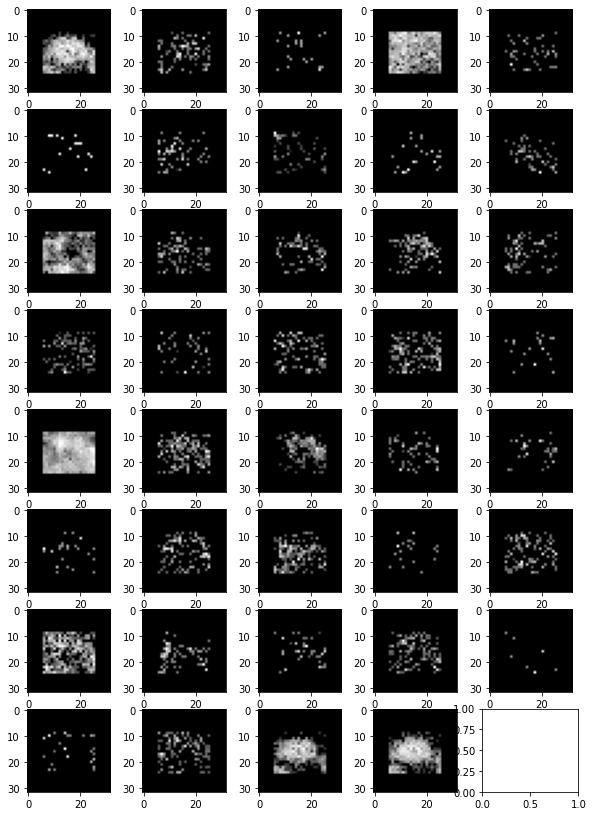

In [89]:
import matplotlib

ds = RGBCells('train', augment=True)
cell_k = 10000
x = ds[cell_k]
print(x.shape)
print(type(x))
x = x.permute(1, 2, 0)
import matplotlib.pyplot as plt
# plt.imshow(x)
axes = plt.subplots(8, 5, figsize=(5 * 2, 8 * 1.8))[1].flatten()
for i in range(39):
    axes[i].imshow(x[:, :, i], cmap=matplotlib.cm.get_cmap('gray'))

## transform, scaling, centering, augmentation, aggressive rotation

torch.Size([39, 32, 32])
<class 'torch.Tensor'>


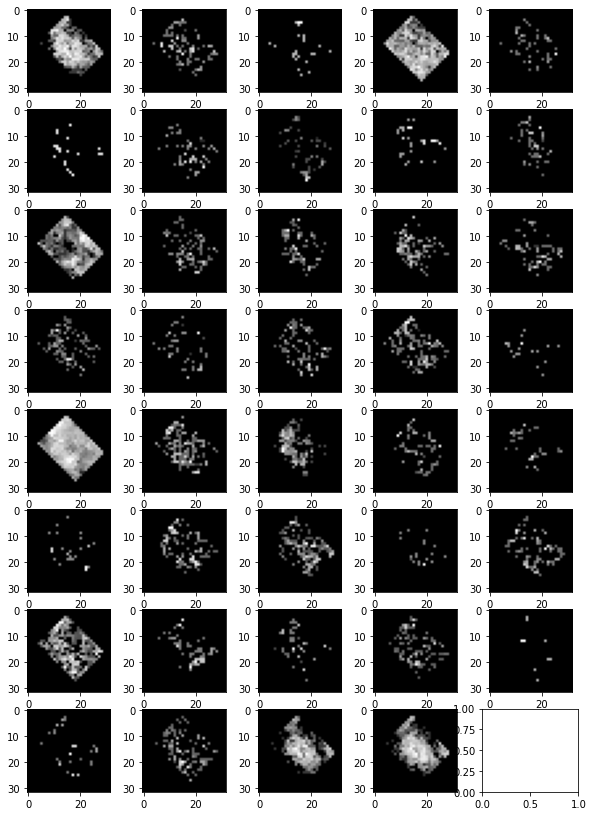

In [97]:
ds = RGBCells('train', augment=True, aggressive_rotation=True)
cell_k = 10000
x = ds[cell_k]
print(x.shape)
print(type(x))
x = x.permute(1, 2, 0)
import matplotlib.pyplot as plt
# plt.imshow(x)
axes = plt.subplots(8, 5, figsize=(5 * 2, 8 * 1.8))[1].flatten()
for i in range(39):
    axes[i].imshow(x[:, :, i], cmap=matplotlib.cm.get_cmap('gray'))